
# Clasificación
## Regresión logística

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn import datasets

Para este ejemplo vamos a utilizar el [Wisconsin Breast Cancer Dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). Es un dataset de imagenes de celulas obtenidas de analisis de personas que sufren un posible cancer de mama.

Las imagenes tienen el siguiente aspecto:

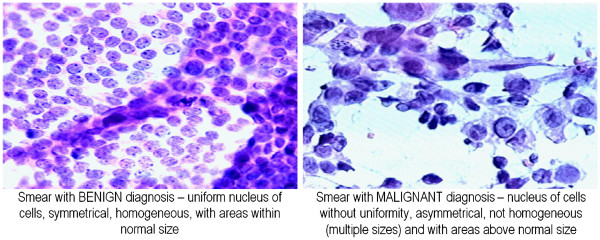

In [2]:
from IPython.display import Image

Image("imagen/breast_cancer.jpeg")

In [3]:
cancer_datos = datasets.load_breast_cancer()
cancer_datos.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
cancer_datos.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
print(cancer_datos["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
cancer_datos["target"][:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [7]:
cancer_datos.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
cancer_df = pd.DataFrame(cancer_datos["data"],
                           columns=cancer_datos["feature_names"]
                          )

cancer_df["objetivo"] = cancer_datos.target

El dataset contiene los valores medios de ciertos parametros del núcleo de las celulas mostradas en las imágenes, así como dichos valores para la celula con características más preocupantes

In [9]:
cancer_df.shape

(569, 31)

In [10]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,objetivo
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [11]:
cancer_df.objetivo.value_counts(True)

1    0.627417
0    0.372583
Name: objetivo, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [13]:
train_df, test_df = train_test_split(cancer_df, test_size=0.4)

variables_entrenamiento = cancer_datos["feature_names"]
variable_objetivo = "objetivo"

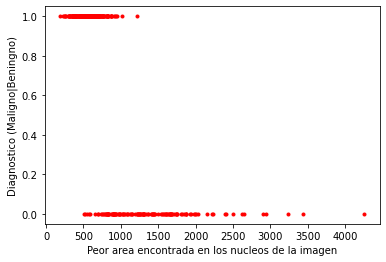

In [14]:
columna_entrenamiento = "worst area"

plt.plot(train_df[columna_entrenamiento], train_df.objetivo, '.r')
plt.xlabel("Peor area encontrada en los nucleos de la imagen")
plt.ylabel("Diagnostico (Maligno|Beningno)");

In [15]:
modelo_ols = LinearRegression()

modelo_ols.fit(train_df[[columna_entrenamiento]],
               train_df[variable_objetivo])

predicciones = modelo_ols.predict(test_df[[columna_entrenamiento]])

predicciones[:10]

array([ 0.81198756, -0.06369361,  0.71085697,  0.78671999,  0.37291073,
        0.41452082,  0.47603137,  0.88851393,  0.77580488,  0.97281958])

Text(0, 0.5, 'Diagnostico (Maligno|Beningno)')

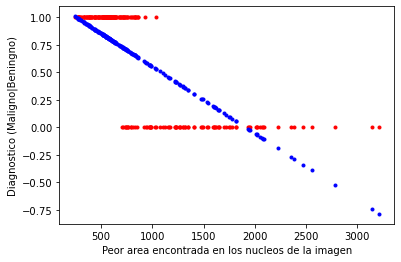

In [16]:
plt.plot(test_df[columna_entrenamiento], test_df.objetivo, '.r')
plt.plot(test_df[columna_entrenamiento], predicciones, '.b')
plt.xlabel("Peor area encontrada en los nucleos de la imagen")
plt.ylabel("Diagnostico (Maligno|Beningno)")

In [17]:
Image("../../media/funcion_logistica.png")

FileNotFoundError: No such file or directory: '../../media/funcion_logistica.png'

FileNotFoundError: No such file or directory: '../../media/funcion_logistica.png'

<IPython.core.display.Image object>

In [18]:
from ipywidgets import interact

def funcion_logistica(x, L=1, k=1, x0=0):
    return L / (1 + np.exp(-k*(x-x0)))


@interact(L=range(1,10), k=range(-5, 5), x0=range(-10,10))
def plot_funcion_logit(L, k, x0):
    x = np.linspace(-5*k, 5*k, 500)
    y = funcion_logit(x, k=k, L=L, x0=x0)
    plt.figure(1)
    plt.plot(x, y)
    plt.show()

interactive(children=(Dropdown(description='L', options=(1, 2, 3, 4, 5, 6, 7, 8, 9), value=1), Dropdown(descri…

In [19]:
predicciones_probabilidades = list(map(funcion_logistica, predicciones))

Text(0, 0.5, 'Diagnostico (Maligno|Beningno)')

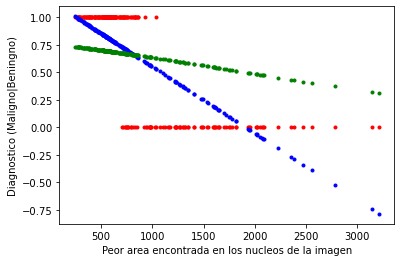

In [20]:
plt.plot(test_df[columna_entrenamiento], test_df.objetivo, '.r')
plt.plot(test_df[columna_entrenamiento], predicciones, '.b')
plt.plot(test_df[columna_entrenamiento], predicciones_probabilidades,'.g')

plt.xlabel("Peor area encontrada en los nucleos de la imagen")
plt.ylabel("Diagnostico (Maligno|Beningno)")

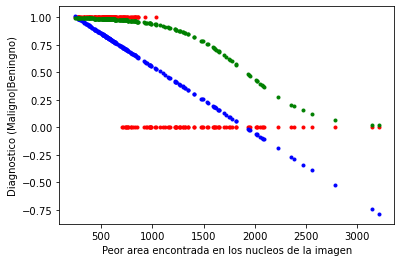

In [21]:
from functools import partial

funcion_logit_k5 = partial(funcion_logistica, k=5)

predicciones_probabilidades = list(map(funcion_logit_k5, predicciones))

plt.plot(test_df[columna_entrenamiento], test_df.objetivo, '.r')
plt.plot(test_df[columna_entrenamiento], predicciones, '.b')
plt.plot(test_df[columna_entrenamiento], predicciones_probabilidades,'.g')

plt.xlabel("Peor area encontrada en los nucleos de la imagen")
plt.ylabel("Diagnostico (Maligno|Beningno)");

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
LogisticRegression??

In [24]:
X = cancer_df[variables_entrenamiento]
y = cancer_df[variable_objetivo]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [25]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
predicciones = clf.predict(X_test)

predicciones[:10]

C:\Users\LCM\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0])

In [26]:
predicciones_probabilidades = clf.predict_proba(X_test)
predicciones_probabilidades[:10]

array([[4.52869709e-04, 9.99547130e-01],
       [5.37036881e-03, 9.94629631e-01],
       [3.18200384e-03, 9.96817996e-01],
       [4.11929782e-03, 9.95880702e-01],
       [9.99996272e-01, 3.72792410e-06],
       [1.94273731e-02, 9.80572627e-01],
       [7.04871142e-03, 9.92951289e-01],
       [4.24890501e-02, 9.57510950e-01],
       [1.00000000e+00, 6.86550458e-17],
       [1.00000000e+00, 3.74277661e-15]])

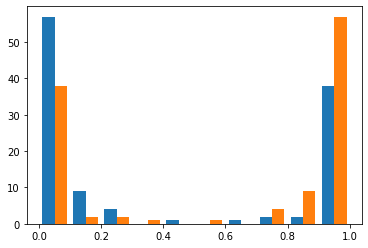

In [27]:
plt.hist(predicciones_probabilidades);

In [28]:
probs_df = pd.DataFrame(predicciones_probabilidades)

In [29]:
X = X_test.reset_index().copy()
X["objetivo"] = y_test.tolist()
X["prediccion"] = predicciones
X = pd.concat([X, probs_df], axis=1)
X[["objetivo", "prediccion", 0, 1]].head(20)

,objetivo,prediccion,0,1
0,1,1,0.000453,9.995471e-01
1,1,1,0.005370,9.946296e-01
2,1,1,0.003182,9.968180e-01
3,1,1,0.004119,9.958807e-01
4,0,0,0.999996,3.727924e-06
5,1,1,0.019427,9.805726e-01
6,1,1,0.007049,9.929513e-01
7,1,1,0.042489,9.575109e-01
8,0,0,1.000000,6.865505e-17
9,0,0,1.000000,3.742777e-15


## Con el Dataset Titanic

In [30]:
df_titanic = pd.read_csv("data/titanic.csv").drop(["name", "ticket", "cabin", "boat", "body", "home.dest"], axis = 1)

In [31]:
df_titanic.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S


In [32]:
df_titanic.survived.value_counts(True)

0    0.618902
1    0.381098
Name: survived, dtype: float64

In [33]:
df_titanic.describe()

,pclass,survived,age,sibsp,parch,fare
count,1312.000000,1312.000000,1049.000000,1312.000000,1312.000000,1311.000000
mean,2.293445,0.381098,29.878138,0.499238,0.387195,33.455997
std,0.838629,0.485842,14.393234,1.040741,0.866930,51.910188
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [34]:
df_titanic.age.fillna(df_titanic.age.mean(), inplace=True)
df_titanic.fare.fillna(df_titanic.fare.mean(), inplace=True)


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [36]:
train_df, test_df = train_test_split(df_titanic, test_size=0.7)

variables_entrenamiento = df_titanic[["pclass", "sex", "age", "sibsp", "parch", "fare", "embarked"]]
variable_objetivo = "survived"

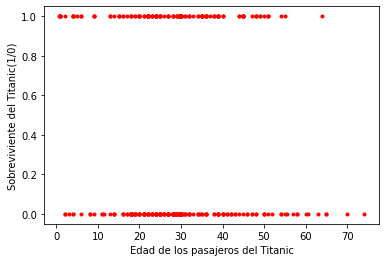

In [37]:
columna_entrenamiento = "age"

plt.plot(train_df[columna_entrenamiento], train_df.survived, '.r')
plt.xlabel("Edad de los pasajeros del Titanic")
plt.ylabel("Sobreviviente del Titanic(1/0)");

In [40]:
variable_objetivo

'survived'

In [41]:
X = cancer_df[variables_entrenamiento]
y = cancer_df[variable_objetivo]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

KeyError: 'survived'

In [42]:
predicciones = modelo_log.predict(test_df[[columna_entrenamiento]])

predicciones[:10]

NameError: name 'modelo_log' is not defined